In [1]:
import os
from pathlib import Path
from arcgis.learn import UnetClassifier, prepare_data

In [3]:
dataTopo = prepare_data(path="C:/Maxwell_Data/topo_data/topo_dl_data/topo_dl_data/processing/ky_chips4", 
                    class_mapping={0:"not", 1:"mine"},
                    chip_size=256,
                    val_split_pct=.2,
                    batch_size=12
                   )

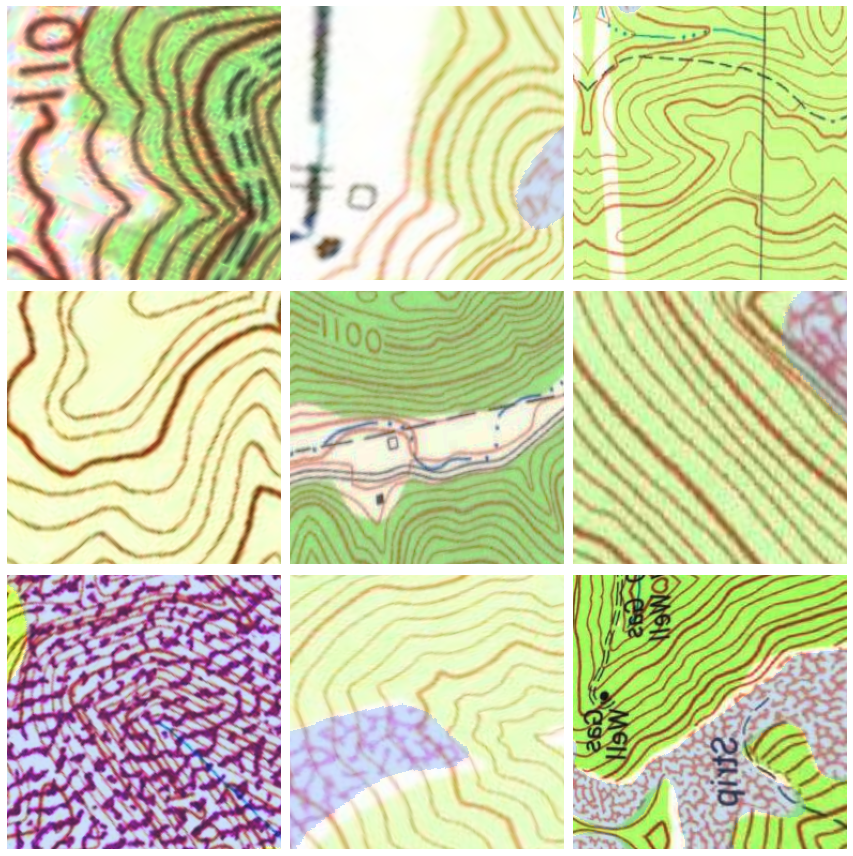

In [8]:
dataTopo.show_batch()

In [5]:
unetL = UnetClassifier(data=dataTopo,
                       doce_loss_fraction=0.3
                      )

In [7]:
unetL.unfreeze()

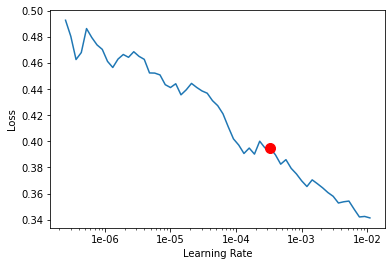

0.0003311311214825911

In [10]:
unetL.lr_find()

In [11]:
unetL.fit(epochs=6,
          one_cycle=True
         )

epoch,train_loss,valid_loss,accuracy,dice,time
0,0.058240,0.044975,0.982730,0.837802,48:14
1,0.047973,0.041749,0.984341,0.866725,21:51
2,0.038350,0.037637,0.986326,0.874362,22:30
3,0.037797,0.032237,0.987340,0.884251,22:49
4,0.033070,0.030594,0.987918,0.889132,23:34
5,0.033521,0.030362,0.988006,0.889507,24:01


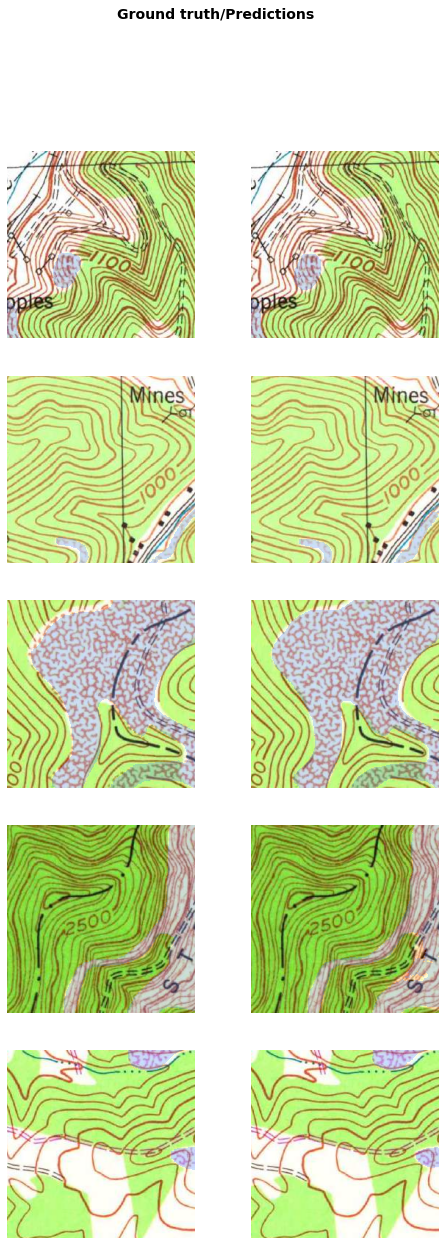

In [12]:
unetL.show_results()

In [14]:
unetL.save('C:/Maxwell_Data/topo_data/for_fast_ai/models/model_3_22_2021')

Computing model metrics...


WindowsPath('C:/Maxwell_Data/topo_data/for_fast_ai/models/model_3_22_2021')

In [15]:
unetL.per_class_metrics()

,NoData,mine
precision,0.991382,0.905896
recall,0.992545,0.882402
f1,0.991928,0.887652


In [36]:
import arcpy
from arcpy.ia import *

In [37]:
out_classified_raster = ClassifyPixelsUsingDeepLearning(r"C:\Maxwell_Data\topo_data\topo_dl_data\topo_dl_data\va_topos\VA_Nora_186109_1958_24000_geo.tif", 
                                r"C:\Maxwell_Data\topo_data\for_fast_ai\models\model_3_22_2021\model_3_22_2021.emd", 
                                "padding 64;batch_size 4;predict_background True;tile_size 256", 
                                "PROCESS_AS_MOSAICKED_IMAGE", 
                                None); 
out_classified_raster.save(r"C:\Maxwell_Data\topo_data\topo_dl_data\topo_dl_data\processing\outputs\nora_out.tif")

KeyboardInterrupt: 

ExecuteError: ERROR 999999: Something unexpected caused the tool to fail. Contact Esri Technical Support (http://esriurl.com/support) to Report a Bug, and refer to the error help for potential solutions or workarounds.
Unable to read pixels from the python raster function.
Function Read Error [Raster Function Template]
Unable to read pixels from the python raster function.
Python raster function's .updatePixels() method returned nothing.
Unable to read pixels from the python raster function.
Function Read Error [Raster Function Template]
Unable to read pixels from the python raster function.
Python raster function's .updatePixels() method returned nothing.
Unable to read pixels from the python raster function.
Function Read Error [Raster Function Template]
Unable to read pixels from the python raster function.
Python raster function's .updatePixels() method returned nothing.
Failed to execute (ClassifyPixelsUsingDeepLearning).
